<h1><center><b>Machine Learning</b></center></h1>
<h3><center>Exercise 4</center></h3>
<h4><center>K-Means and PCA<center></h4>

*Your* Name:  
<font color='red'>
Gideon Neeman, 329924567   
</font>


**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure you don't leave empty cells or empty answers.
- You should not change the code we provided you.
To Download the notebook go to **"File"** -> **"Download .ipynb"**.  
- Submit deadline: 4/7/2024 at 23:59

## Part 1 - K-Means (50%)

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

### **1. Useful packages**

In [322]:
import matplotlib.pyplot as plt
import numpy as np


### **2. Data**

Generate a 2D dataset

In [323]:
## Generate 2D data
X = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X)

print(X.shape)

(2000, 2)


Plot the data to explore how many clusters it contains

C:\Users\gideo\AppData\Local\Temp\ipykernel_20680\1871301639.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis')


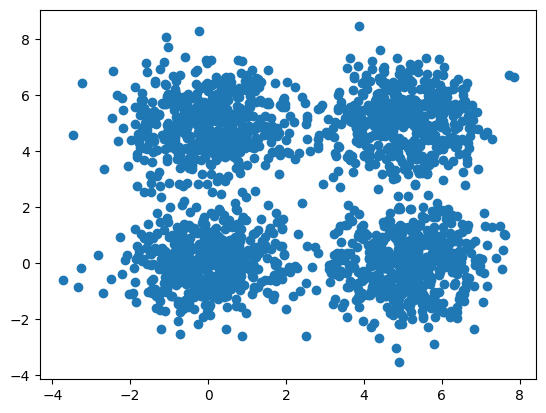

In [324]:
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')

### **3. K-Means**

Implement the algorithm

In [325]:
class KMeans():
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

        ######## Helper fields #########
        self.X_fit_ = X      # Here you should store the dataset X.
                                # This can be useful for the next tasks.

        self.labels_ = None     # Here you should store the final labels.
                                # That is, the clusters indices for all the samples

        self.centroids = None   # Here you should store the final centroids.

        self.labels_history = []    # Here you should store the labels of each iteration.
                                    # This can also be useful later.

        self.centroids_history = [] # Here you should store the centroids of each iteration.
                                    # This can also be useful later.

        self.costs = []             # Here you should store the costs of the iterations.
                                    # That is, you should calculate the cost in every iteration
                                    # and store it in this list.


    def fit_plot(self, X):
        self.X_fit_ = X
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[indices]
        for i in range(self.max_iter):
            self._get_distances(X)
            self._get_labels(X)
            self._get_centroids(X, self.labels_)
            self._calculate_cost(X)
            if i <= 7:
                plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
                plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', s=50, marker='x',label='Centroids')
                colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))
                cluster_patches = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=f'Cluster {i}') for i in range(n_clusters)]
                centroid_patch = Line2D([0], [0], marker='x', color='red',linestyle='none',markersize=10, label='Centroids')
                plt.legend(handles=cluster_patches +[centroid_patch])
                plt.title(f'Iteration {i} of K-Means')
                plt.show()
        return self.centroids
    def fit(self, X):
        self.X_fit_ = X
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[indices]
        for i in range(self.max_iter):
            self._get_distances(X)
            self._get_labels(X)
            self._get_centroids(X, self.labels_)
            self._calculate_cost(X)
        return self.centroids
            
    def predict(self, X):
        distances = self._get_distances(X)
        nearest_centroids = np.argmin(distances, axis=1)
        return nearest_centroids

    def _get_distances(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i in range(self.n_clusters):
            distances[:, i] = np.linalg.norm(X - self.centroids[i], axis=1)
        return distances

    def _get_labels(self, X):
        self.labels_ = np.argmin(self._get_distances(X), axis=1)
        self.labels_history.append(self.labels_.copy())
        return self.labels_

    def _get_centroids(self, X, labels):
        self.centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            if len(X[labels == i]) == 0:
                self.centroids[i] = X[np.random.choice(X.shape[0])]
            else:
                self.centroids[i] = X[labels == i].mean(axis=0)
        self.centroids_history.append(self.centroids.copy())
        return self.centroids

    def _calculate_cost(self, X):
        dist = self._get_distances(X)
        min_dist = np.min(dist, axis=1)
        cost = np.sum(min_dist ** 2)
        self.costs.append(cost)
        return cost




Run the algorithm on the 2D dataset

In [326]:
n_clusters = 20
max_iter = 20
kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter)
kmeans.fit(X)

array([[ 5.21385601,  1.15153203],
       [ 4.51018661,  6.52836167],
       [ 4.06516589, -0.06772763],
       [ 0.73442238,  1.40388079],
       [ 6.09684496,  5.82983371],
       [-1.12873957,  4.14799554],
       [ 4.94240598,  5.29443907],
       [ 4.3641052 ,  3.9250527 ],
       [-0.65207413,  5.8159917 ],
       [ 0.60929734,  4.25278392],
       [ 1.69005322, -0.25984196],
       [ 3.49627686,  5.07624076],
       [-1.36310177, -0.5479871 ],
       [ 1.03435626,  5.7826464 ],
       [-0.01911135, -1.19668284],
       [ 6.40085993,  0.23152204],
       [-0.91847893,  0.80630624],
       [ 5.26244255, -1.1464721 ],
       [ 5.90672302,  4.13685887],
       [ 0.29850584,  0.10462916]])

Plot a graph of the costs as a function of the iterations

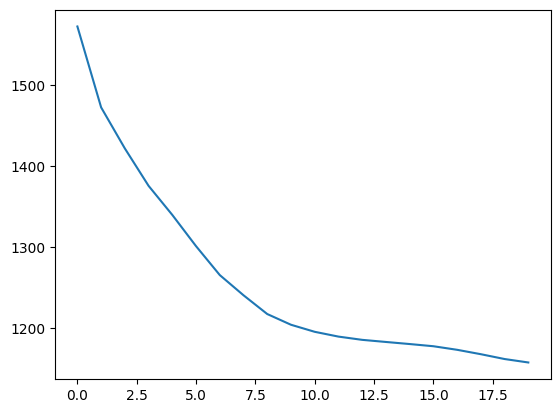

In [327]:
costs = kmeans.costs
plt.plot(costs)

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters: 16232.990832780688 <br>
3 clusters: 9859.849320493428 <br>
4 clusters: 3925.999146418897 <br>
6 clusters: 3192.9219394340453 <br>
8 clusters: 2576.802880318959 <br>
10 clusters: 2158.8062372195363 <br>
20 clusters: 1212.2610313372147 <br>

Now write a code that plots the clusters and the locations of the centroids at each iteration

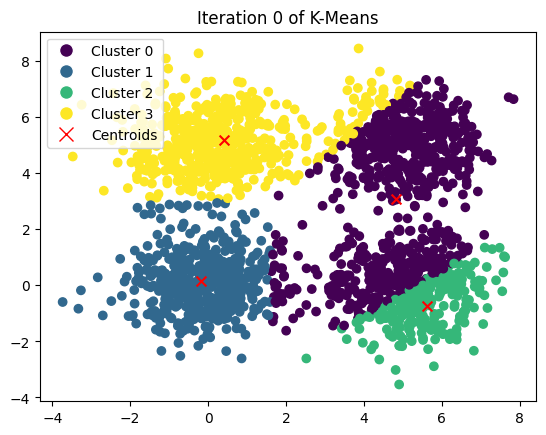

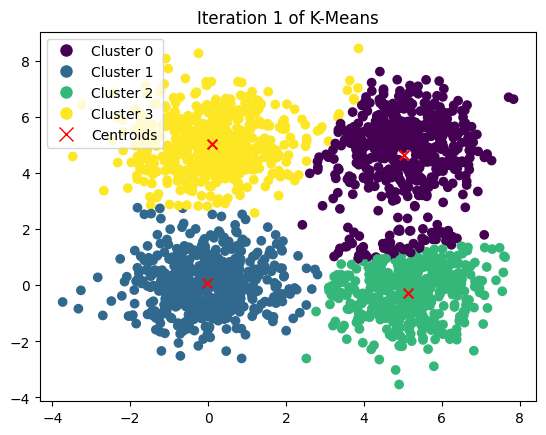

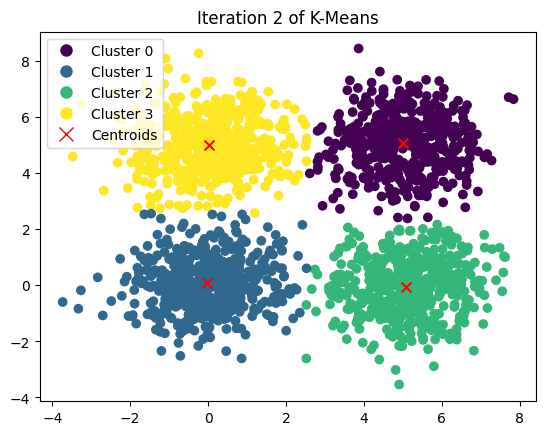

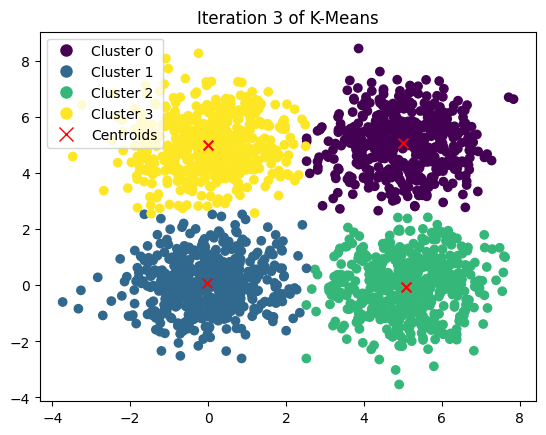

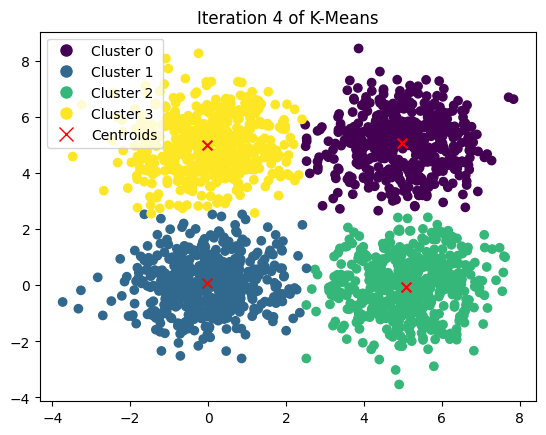

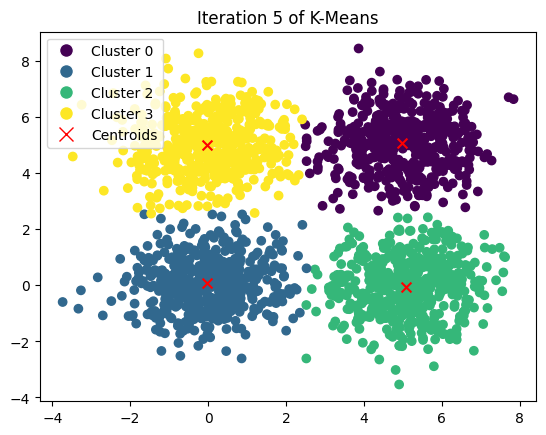

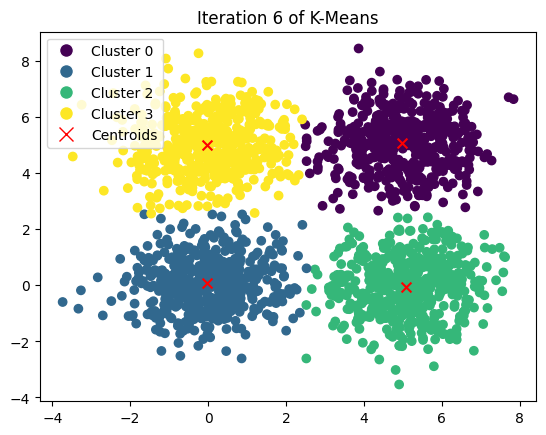

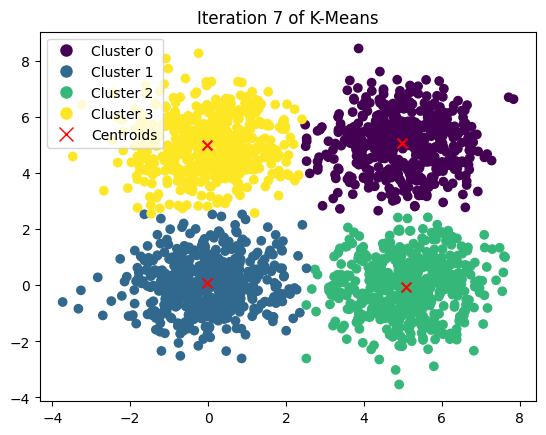

array([[ 4.9839727 ,  5.0791833 ],
       [-0.02604677,  0.07096593],
       [ 5.08707888, -0.04705941],
       [-0.01793349,  5.00746428]])

In [328]:
########################
#### YOUR CODE HERE ####
########################
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
n_clusters = 4
max_iter = 20
kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter)
kmeans.fit_plot(X)
# plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
# plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', s=50, marker='x',label='Centroids')
# colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))
# cluster_patches = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=f'Cluster {i}') for i in range(n_clusters)]
# centroid_patch = Line2D([0], [0], marker='x', color='red',linestyle='none',markersize=10, label='Centroids')
# plt.legend(handles=cluster_patches +[centroid_patch])
# plt.show()


## Part 2 - PCA (50%)

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [329]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [330]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [331]:
import numpy as np

class PCA:
    def __init__(self):
        self.V = None

    def fit(self, X):
        X_centered = X - np.mean(X, axis=0)
        covariance_matrix = np.cov(X_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        idx = np.argsort(eigenvalues)[::-1]
        self.V = eigenvectors[:, idx]

    def transform(self, X, n_dimensions):
        # Center the data
        X_centered = X - np.mean(X, axis=0)
        # Project the data onto the first n_dimensions eigenvectors
        return np.dot(X_centered, self.V[:, :n_dimensions])

Run the algorithm on MNIST dataset.

In [332]:
pca = PCA()
pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2)

Plot the data in the top 2 principal component space.

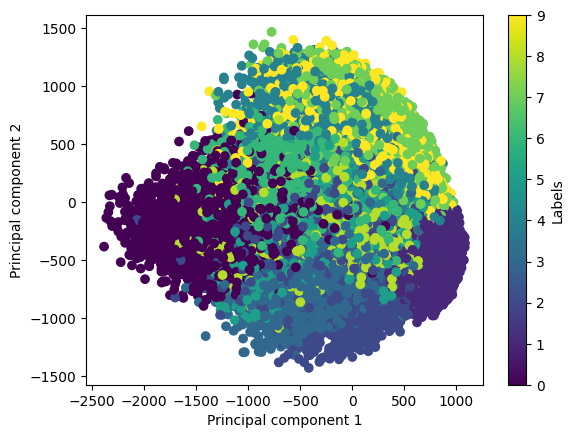

In [333]:
y = [int(label) for label in y]
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()

As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices

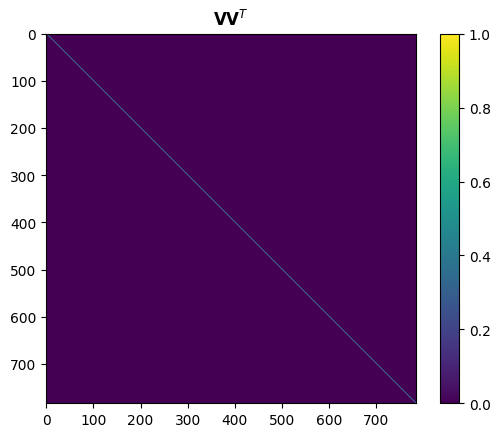

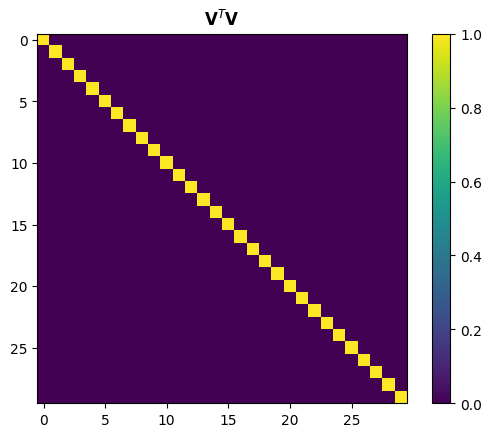

In [334]:
########################
#### YOUR CODE HERE ####
########################
pca = PCA()
pca.fit(X)
X_reduced = pca.transform(X, 2)
VVt = np.dot(pca.V, pca.V.T)
plt.imshow(VVt, cmap='viridis')
plt.title('$\mathbf{V}\mathbf{V}^T$')
plt.colorbar()
plt.show()
VtV = np.dot(pca.V.T, pca.V)
# reduce the data
VtV = VtV[:30,:30]
plt.imshow(VtV, cmap='viridis')
plt.title('$\mathbf{V}^T\mathbf{V}$')
plt.colorbar()
plt.show()

Your Explanation: VtV = I because the columns are eigenvectors of the cov matrix and V is orthogonal because the eigenvectors are orthonormal
VVt = represents the projection onto the subspace spanned by the eigenvectors . it equals I only if V is the full basis

Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [335]:
def pca_reconstruction(x, n_dimentions):
    #### YOUR CODE HERE ####
    return x_reconstructed

Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image the original image?
<br><br>

Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


In [336]:
########################
#### YOUR CODE HERE ####
########################